# Try creating a neat feature matrix for H1C IDR2.2 Validation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors,cm

import pathlib

In [2]:
# Whether to make the plot horizontal
hrz = True

In [3]:
tests = ['0.0', '0.1', '0.2', '1.0', '1.1', '1.2', '2.0', '2.1', '3.1', '3.2', '4.0']
subcategories = ['Input Data', 'Visibility\nSimulator', 'Systematic\nSimulation','Analysis\nPipeline', 'Pspec\nPipe']
nodes = [
    'Fagnoni+ Beam', 'HERA37 Ideal Baselines', 'eGSM', 'GLEAM', 'Power-Law EoR P(k)', 'Flat EoR P(k)', 'IDR2.2 Flags',
    'RIMEz', 'HEALVIS','pyuvsim',
    'Thermal Noise', 'Antenna Gains', 'Cross-Coupling', 'Cable Reflections',
    'redcal', 'abscal Modelling', 'abscal', 'xrfi', 'smoothcal', 'LST binning', 'Delay In-Painting', 'Systematics Removal', 'Baseline+Time Averaging',
    'pspec', 'simpleDS', 'Error Estimation'
]

matrix = [
    [(0, 0, 0, 0, 0, 0, 0), (0, 0, 0), (1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0)],  # 0.0
    [(0, 0, 0, 0, 0, 1, 0), (0, 1, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0)],  # 0.1
    [(1, 1, 0, 0, 1, 0, 0), (1, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0)],  # 0.2
    [(1, 1, 1, 0, 1, 0, 0), (1, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0)],  # 1.0
    [(1, 1, 0, 1, 1, 0, 0), (1, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0)],  # 1.1
    [(1, 1, 1, 1, 1, 0, 0), (1, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0)],  # 1.2
    [(0, 0, 0, 1, 0, 0, 0), (0, 0, 1), (0, 1, 0, 0), (1, 0, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0)],  # 2.0
    [(1, 1, 1, 1, 1, 0, 0), (1, 0, 0), (0, 1, 0, 0), (1, 0, 1, 0, 1, 0, 0, 0, 0), (1, 0, 0)],  # 2.1
    [(1, 1, 1, 1, 1, 0, 1), (1, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0), (1, 0, 0)],  # 3.1
    [(1, 1, 1, 1, 1, 0, 0), (1, 0, 0), (0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0), (1, 0, 0)],  # 3.2
    [(1, 1, 1, 1, 1, 0, 1), (1, 0, 0), (1, 1, 1, 1), (1, 0, 1, 0, 1, 1, 1, 1, 1), (1, 1, 1)],  # 4.0
    
]

In [4]:
M = []
subcat_lengths = [len(subcat) for subcat in matrix[0]]

if hrz:
    boundaries = [0] + [sum(subcat_lengths[:i]) for i in range(len(subcat_lengths))] + [sum(subcat_lengths)]
else:
    boundaries = [0] + [sum(subcat_lengths[i:]) for i in range(len(subcat_lengths))][::-1] + [sum(subcat_lengths)]
    
for test in matrix:
    m = []
    for i, subcat in enumerate(test):
        if hrz:
            m += [sum(subcat_lengths[:i])*mm + 0.1 if mm else 0 for mm in subcat]
        else:
            m += [sum(subcat_lengths[(i+1):])*mm + 0.1 if mm else sum(subcat_lengths)-0.9 for mm in subcat]
    M.append(m)
    
M = np.array(M)

if hrz:
    boundaries[1] += 1
    M[M==0.1] = 1.1
else:
    boundaries[-2] -= 1


In [5]:
print(M[0])
print(boundaries)

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.1  0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.  23.1  0.   0. ]
[0, 1, 7, 10, 14, 23, 26]


In [6]:
# Get a nice colormap that has segments as long as each subcategory of the pipeline.
set2 = cm.get_cmap('Set2')

if hrz:
    cmap = colors.ListedColormap((set2.colors[-1],) + set2.colors[:len(subcategories)][::-1])
else:
    cmap = colors.ListedColormap(set2.colors[:len(subcategories)]+(set2.colors[-1],))
norm = colors.BoundaryNorm(boundaries, cmap.N)

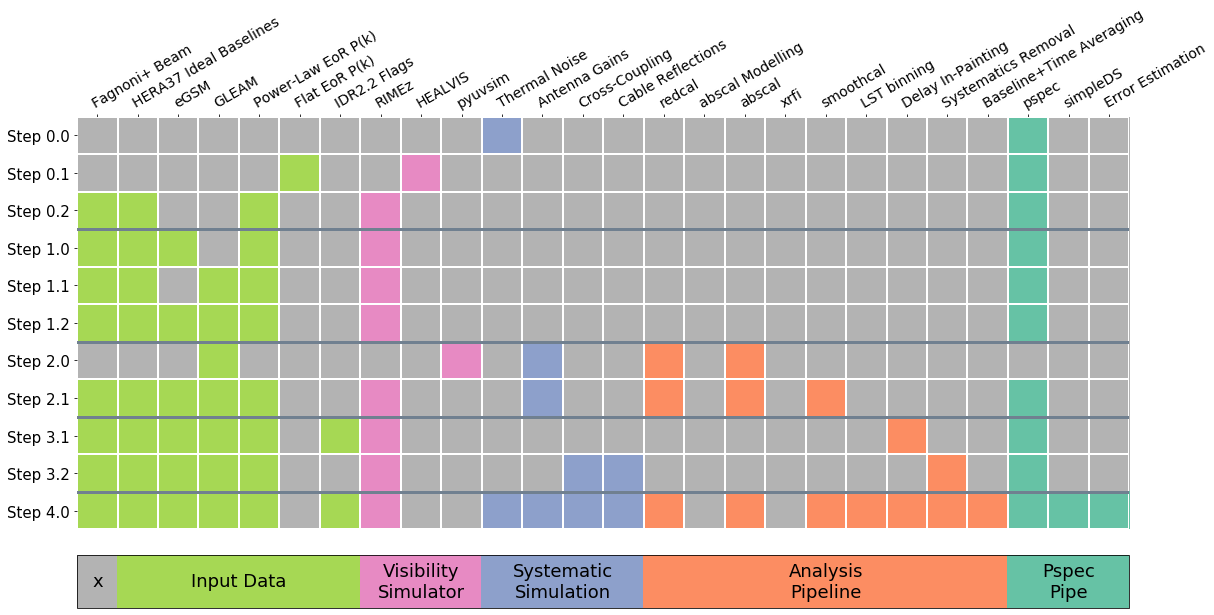

In [7]:
fig, ax = plt.subplots(1,1, figsize=(17, 9) if hrz else (12,17))
cax = plt.imshow(M if hrz else M.T, aspect='auto', cmap=cmap, norm=norm)

getattr(ax, f"set_{'y' if hrz else 'x'}ticks")(range(len(tests)))
getattr(ax, f"set_{'y' if hrz else 'x'}ticklabels")([f"Step {t}" for t in tests], fontsize=15)
getattr(ax, f"set_{'x' if hrz else 'y'}ticks")(range(len(nodes)))
getattr(ax, f"set_{'x' if hrz else 'y'}ticklabels")(nodes, fontsize=14)


# Let the horizontal axes labeling appear on top.
ax.tick_params(
    top=True, bottom=False,
    labeltop=True, labelbottom=False,
)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), rotation=30, ha="left",
    rotation_mode="anchor"
)

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xticks(np.arange(len(nodes if hrz else tests)+1)-.5, minor=True)
ax.set_yticks(np.arange(len(tests if hrz else nodes)+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)

# Put some dark grey vertical lines between major steps
fnc = getattr(ax, 'axhline' if hrz else 'axvline')
for x in [2.5, 5.5, 7.5, 9.5]:
    fnc(x,linewidth=3, color='slategray')

cbar = fig.colorbar(cax, spacing='proportional', orientation='horizontal' if hrz else 'vertical', pad=0.05)


getattr(cbar.ax, 'get_xaxis' if hrz else 'get_yaxis')().set_ticks([])
if hrz: 
    clabels = subcategories[::-1] + ['x']
else:
    clabels = ['x'] + subcategories
for i, label in enumerate(clabels):
    xy = [.5, (boundaries[-i-1] + boundaries[-i-2])/2/max(boundaries)]
    if hrz:
        xy = xy[::-1]
    cbar.ax.text(
        *xy,
        label, ha='center', va='center', rotation=0 if hrz else 90, 
        fontsize=18
    )

plt.tight_layout()
plt.savefig(pathlib.Path('~/validation-feature-matrix.pdf').expanduser())

#plt.yticks(nodes)

In [9]:
clabels

['Pspec\nPipe',
 'Analysis\nPipeline',
 'Systematic\nSimulation',
 'Visibility\nSimulator',
 'Input Data',
 'x']